# Sweep Examples

In [1]:
import alive_progress
import numpy as np
import matplotlib.pyplot as plt
import splib07
import xarray

import rtm_wrapper.plot as rtm_plot
from rtm_wrapper.engines.sixs import PySixSEngine, pysixs_default_inputs
from rtm_wrapper.execution import ConcurrentExecutor
from rtm_wrapper.simulation import SweepSimulation
import rtm_wrapper.parameters as rtm_param

Define wavelengths used in all examples below.

In [2]:
wavelengths = np.linspace(0.2, 2.5, 200)

Sweep a single input parameter.

|████████████████████████████████████████| 200/200 [100%] in 2.2s (88.47/s)     


<xarray.DataArray 'apparent_radiance' (wavelength__value: 200)>
array([1.37000e-01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e-03, 3.79300e+00,
       2.09750e+01, 4.49910e+01, 5.22110e+01, 5.72790e+01, 6.33720e+01,
       6.92240e+01, 5.87170e+01, 8.31730e+01, 1.11524e+02, 1.15817e+02,
       1.02365e+02, 1.28350e+02, 1.40749e+02, 1.41048e+02, 1.43746e+02,
       1.37120e+02, 1.34632e+02, 1.33776e+02, 1.30269e+02, 1.34674e+02,
       1.32988e+02, 1.30891e+02, 1.26856e+02, 1.30034e+02, 1.17831e+02,
       1.25198e+02, 1.20288e+02, 1.18930e+02, 1.18582e+02, 1.14522e+02,
       1.13488e+02, 1.12095e+02, 1.08948e+02, 1.04546e+02, 1.01442e+02,
       6.77290e+01, 8.95390e+01, 9.46170e+01, 9.46000e+01, 8.62430e+01,
       9.02990e+01, 8.42230e+01, 8.54900e+01, 7.57140e+01, 7.07820e+01,
       7.54920e+01, 7.62780e+01, 7.61020e+01, 7.33860e+01, 7.38230e+01,
       7.20830e+01, 6.00510e+01, 3.87040e+01, 5.53860e+01, 3.37400e+01,
       1.92290e+01, 3.30580e+01, 4.83860e+01, 5.08720e+01, 5.75780e+01,
       5.51640e+01, 5.46180e+01, 5.36400e+01, 5.23640e+01, 5.08040e+01,
       4.90770e+01, 4.57840e+01, 4.28240e+01, 4.14620e+01, 2.00220e+01,
       6.59200e+00, 6.68000e-01, 1.26560e+01, 2.22660e+01, 3.40500e+01,
       3.04070e+01, 3.52600e+01, 3.33150e+01, 3.43760e+01, 3.57420e+01,
               nan, 3.37640e+01, 3.17260e+01, 3.09800e+01, 2.93580e+01,
       2.67460e+01, 2.17160e+01, 1.84090e+01, 1.35550e+01, 5.44900e+00,
       8.60000e-02, 6.30000e-02, 1.30000e-02, 9.01000e-01, 2.40000e-02,
       3.73000e-01, 2.15800e+00, 1.88300e+00, 9.74000e+00, 6.46600e+00,
       1.72800e+00, 7.06000e+00, 1.32550e+01, 1.80160e+01, 1.87360e+01,
       1.99610e+01, 2.07200e+01, 2.05090e+01, 2.02290e+01, 1.93150e+01,
       1.95300e+01, 1.89050e+01, 1.75910e+01, 1.83510e+01, 1.78640e+01,
       1.71070e+01, 1.69420e+01, 1.64040e+01, 1.61970e+01, 1.49740e+01,
       1.47700e+01, 1.37580e+01, 1.27760e+01, 1.20400e+01, 9.89100e+00,
       1.35060e+01, 1.00080e+01, 7.12100e+00, 2.90200e+00, 8.01000e-01,
       3.01000e-01, 3.00000e-03, 1.90000e-02, 2.80000e-02, 4.10000e-02,
       0.00000e+00, 6.40000e-02, 2.00000e-03, 5.80000e-02, 2.00000e-03,
       1.45000e-01, 7.77000e-01, 1.30400e+00, 2.66200e+00, 4.94800e+00,
       6.17600e+00, 2.67400e+00, 2.40100e+00, 5.93600e+00, 7.14100e+00,
       5.56400e+00, 5.81000e+00, 5.74400e+00, 6.55200e+00, 6.75900e+00,
       7.09200e+00, 6.59300e+00, 6.60300e+00, 6.74300e+00, 5.88400e+00,
       6.06300e+00, 5.85500e+00, 5.39700e+00, 5.12500e+00, 5.87800e+00,
       5.63200e+00, 5.52400e+00, 5.40000e+00, 5.13400e+00, 4.97700e+00,
       4.95700e+00, 4.77600e+00, 4.57500e+00, 3.95300e+00, 4.55500e+00,
       3.79900e+00, 2.82500e+00, 3.59000e+00, 2.76300e+00, 2.46500e+00,
       3.08100e+00, 2.34400e+00, 1.33700e+00, 3.94400e+00, 3.44100e+00,
       1.34200e+00, 2.39600e+00, 1.41500e+00, 8.22000e-01, 5.08000e-01])
Coordinates:
  * wavelength__value  (wavelength__value) float64 0.2 0.2116 ... 2.488 2.5
Attributes:
    title:    Apparent Radiance
    unit:     W/sr-m^2

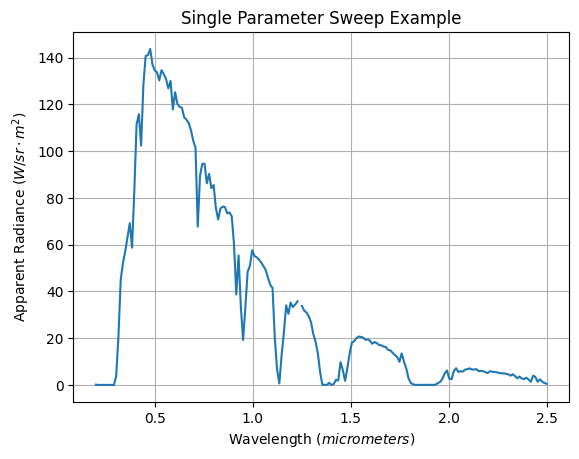

In [3]:
sweep = SweepSimulation(
    {
        "wavelength__value": wavelengths,
    },
    base=pysixs_default_inputs(),
)

engine = PySixSEngine()
runner = ConcurrentExecutor()

with alive_progress.alive_bar(sweep.sweep_size, force_tty=True) as bar:
    runner.run(sweep, engine, lambda _: bar())

results = runner.collect_results()
plot_var = results.apparent_radiance

display(plot_var)
fig, ax = rtm_plot.plot_sweep_single(plot_var)
ax.set_title("Single Parameter Sweep Example")
ax.grid(True);

Sweep through the cartesian product of two input parameter ranges:

|████████████████████████████████████████| 1200/1200 [100%] in 13.2s (90.71/s)  


<xarray.DataArray 'apparent_radiance' (ground__reflectance: 6,
                                       wavelength__value: 200)>
array([[ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 7.800e-02,  0.000e+00,  0.000e+00, ...,  9.380e-01,  5.450e-01,
         3.370e-01],
       [ 2.190e-01,  0.000e+00,  0.000e+00, ...,  1.897e+00,  1.102e+00,
         6.810e-01],
       [ 5.460e-01,  1.000e-03,  0.000e+00, ...,  2.879e+00,  1.673e+00,
         1.033e+00],
       [ 2.157e+00,  2.000e-03,  0.000e+00, ...,  3.883e+00,  2.257e+00,
         1.394e+00],
       [-2.804e+00,  4.600e-02,  0.000e+00, ...,  4.912e+00,  2.854e+00,
         1.763e+00]])
Coordinates:
  * ground__reflectance  (ground__reflectance) float64 0.0 0.2 0.4 0.6 0.8 1.0
  * wavelength__value    (wavelength__value) float64 0.2 0.2116 ... 2.488 2.5
Attributes:
    title:    Apparent Radiance
    unit:     W/sr-m^2

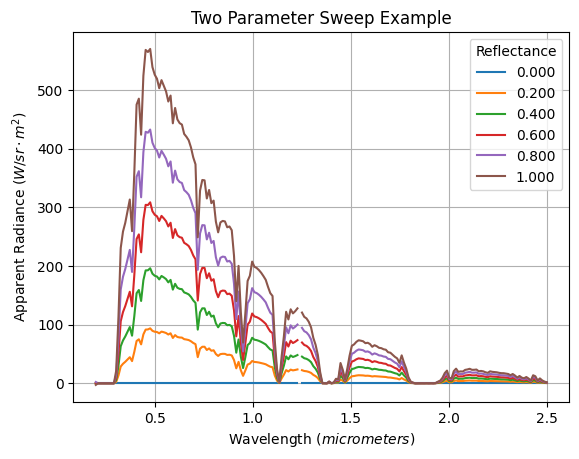

In [4]:
sweep = SweepSimulation(
    {
        "ground__reflectance": np.linspace(0, 1, 6),
        "wavelength__value": wavelengths,
    },
    base=pysixs_default_inputs(),
)

engine = PySixSEngine()
runner = ConcurrentExecutor()

with alive_progress.alive_bar(sweep.sweep_size, force_tty=True) as bar:
    runner.run(sweep, engine, lambda _: bar())

results = runner.collect_results()
plot_var = results.apparent_radiance

display(plot_var)
fig, ax = rtm_plot.plot_sweep_legend(plot_var)
ax.set_title("Two Parameter Sweep Example")
ax.grid(True);

Sweep through the cartesian product of three input parameter ranges:

|████████████████████████████████████████| 1200/1200 [100%] in 13.2s (90.60/s)  


<xarray.DataArray 'apparent_radiance' (aerosol_profile__name: 3,
                                       altitude_sensor__name: 2,
                                       wavelength__value: 200)>
array([[[0.137, 0.   , 0.   , ..., 1.415, 0.822, 0.508],
        [0.137, 0.   , 0.   , ..., 1.415, 0.822, 0.508]],

       [[0.051, 0.   , 0.   , ..., 1.407, 0.817, 0.505],
        [0.051, 0.   , 0.   , ..., 1.407, 0.817, 0.505]],

       [[0.096, 0.   , 0.   , ..., 1.433, 0.833, 0.514],
        [0.096, 0.   , 0.   , ..., 1.433, 0.833, 0.514]]])
Coordinates:
  * aerosol_profile__name  (aerosol_profile__name) <U11 'Maritime' ... 'Conti...
  * altitude_sensor__name  (altitude_sensor__name) <U9 'sealevel' 'satellite'
  * wavelength__value      (wavelength__value) float64 0.2 0.2116 ... 2.488 2.5
Attributes:
    title:    Apparent Radiance
    unit:     W/sr-m^2

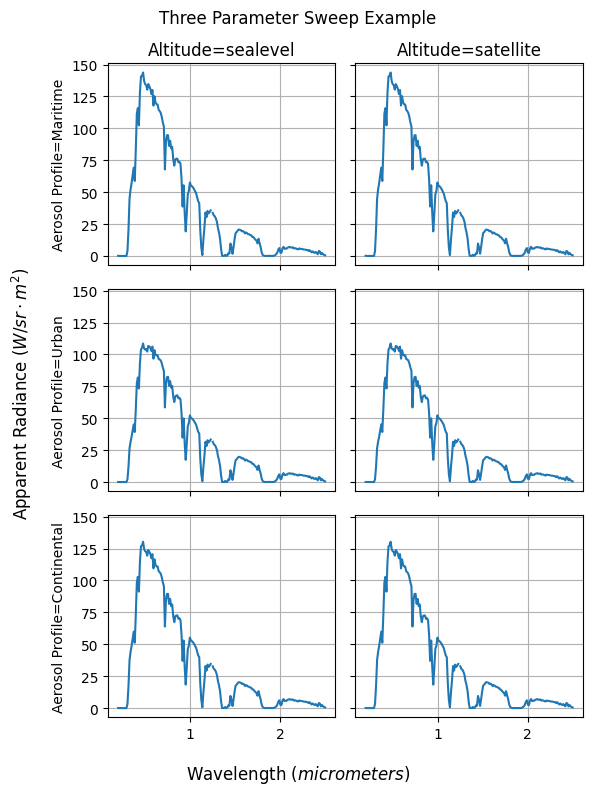

In [5]:
sweep = SweepSimulation(
    {
        "aerosol_profile__name": ["Maritime", "Urban", "Continental"],
        "altitude_sensor__name": ["sealevel", "satellite"],
        "wavelength__value": wavelengths,
    },
    base=pysixs_default_inputs(),
)

engine = PySixSEngine()
runner = ConcurrentExecutor()

with alive_progress.alive_bar(sweep.sweep_size, force_tty=True) as bar:
    runner.run(sweep, engine, lambda _: bar())

results = runner.collect_results()
plot_var = results.apparent_radiance

display(plot_var)
fig = plt.figure(figsize=(6, 8))
_, axs = rtm_plot.plot_sweep_grid(
    plot_var, fig=fig, subplot_kwargs={"sharex": "all", "sharey": "all"}
)
fig.suptitle("Three Parameter Sweep Example")
for ax in axs.flat:
    ax.grid(True)
fig.tight_layout();

Complex sweep.

|████████████████████████████████████████| 600/600 [100%] in 7.9s (75.05/s)     


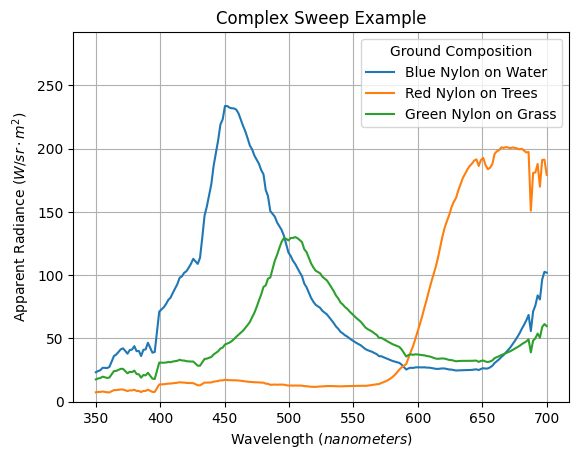

In [6]:
wavelengths = np.linspace(0.35, 0.7, 200)

usgs_lib = splib07.Splib07("./usgs_splib07")

targets = {
    "Blue Nylon": "Nylon_Fabric_GDS433_Blu_RpSt",
    "Red Nylon": "Nylon_Fabric_GDS431_Red_RpSt",
    "Green Nylon": "Nylon_Fabric_GDS432_Grn_RpSt",
}
backgrounds = {
    "Water": "MarshWater_CRMS121v69-NoGlnt",
    "Trees": "Oak_Oak-Leaf-1_fresh",
    "Grass": "Grass_Golden_Dry_GDS480",
}


target_lib = [
    usgs_lib.load(name, resample="oversampled") for name in targets.values()
]

background_lib = [
    usgs_lib.load(name, resample="oversampled") for name in backgrounds.values()
]
labels = [f"{target} on {back}" for target, back in zip(targets, backgrounds)]


sweep = SweepSimulation(
    {
        "target": {
            "ground__target__wavelengths": [l.wavelengths for l in target_lib],
            "ground__target__spectrum": [l.spectrum for l in target_lib],
            "ground__background__wavelengths": [l.wavelengths for l in background_lib],
            "ground__background__spectrum": [l.spectrum for l in background_lib],
            "__coords__": labels,
            "__title__": "Ground Composition",
        },
        "wl": {
            "wavelength__value": wavelengths,
            "__coords__": wavelengths * 1e3,
            "__title__": "Wavelength",
            "__unit__": "nanometers",
        }
    },
    base=pysixs_default_inputs().replace(
        ground=rtm_param.GroundReflectanceHeterogeneousLambertian(
            target=rtm_param.GroundReflectanceHomogenousLambertian(None, None),
            background=rtm_param.GroundReflectanceHomogenousLambertian(None, None),
        )
    ),
)

engine = PySixSEngine()
runner = ConcurrentExecutor()

with alive_progress.alive_bar(sweep.sweep_size, force_tty=True) as bar:
    runner.run(sweep, engine, lambda _: bar(), on_error="abort")

results = runner.collect_results()
plot_var = results.apparent_radiance
plot_var = plot_var.sel(wl=~np.isnan(plot_var).any(axis=0))

fig, ax = rtm_plot.plot_sweep_legend(plot_var, legend_kwargs={"loc": "upper right"})
ax.set_title("Complex Sweep Example")
ax.set_ylim(0, np.nanmax(plot_var.values)*1.25)
ax.grid(True);